In [247]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

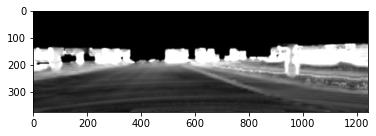

In [271]:
img_ADI = plt.imread('/home/sourish-wicon-lab/Documents/WSN/ADI-testing/ADI/umm_000001.png')
img_only = plt.imread('/home/sourish-wicon-lab/Documents/WSN/data_road/training/image_2/umm_000001.png')
img_only = img_only[:,:,0]
plt.imshow(img_ADI,'gray')

In [227]:
img_only.shape

(375, 1242)

In [228]:
def img_ADI_det(img_ADI):
    _,thresh = cv2.threshold(img_ADI, np.mean(img_ADI)-0.009, 255, cv2.THRESH_BINARY_INV)
    #
    #img_not = cv2.bitwise_not(thresh)
    #fin_img = cv2.Sobel(src=img_not, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=9) 
    #fin_img = cv2.bitwise_not(fin_img)
    fin_img = thresh
    return fin_img

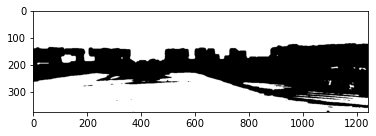

In [229]:
img_op = img_ADI_det(img_ADI)
img_op2 = img_ADI_det(img_only)
img_plard = plt.imread('/home/sourish-wicon-lab/Documents/WSN/PLARD/outputs/results/umm_road_000001.png')
plt.imshow(img_op,'gray')

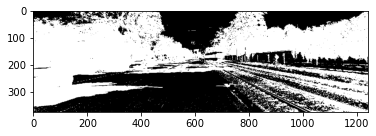

In [230]:
plt.imshow(img_op2,'gray')

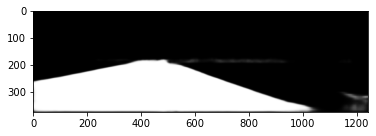

In [231]:
plt.imshow(img_plard,'gray')

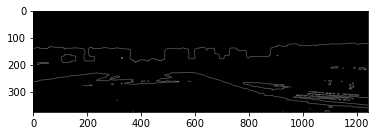

In [233]:
#kernel_size = 5
#blur = cv2.GaussianBlur(img_ADI, (kernel_size, kernel_size), 0)
slice1Copy = np.uint8(img_op)
low_t = 50
high_t = 200
edges = cv2.Canny(slice1Copy, low_t, high_t)

plt.imshow(edges,'gray')


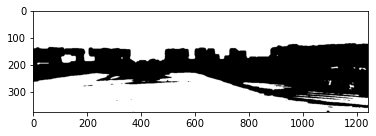

In [234]:
plt.imshow(img_op,'gray')

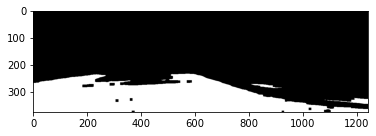

In [242]:
kernel = 1/13**2*np.ones((9,9))
#er = cv2.dilate(img_op,kernel)
er = cv2.erode(img_op,kernel,iterations = 1)

# kernel = 1/11**2*np.ones((11,11))
# er = cv2.dilate(img_op,kernel)
for i in range(er.shape[0]):
    for j in range(er.shape[1]):
        if i<=200:
            er[i,j] = 0
# kernel = 1/3**2*np.ones((3,3))
# er = cv2.dilate(img_op,kernel,iterations = 1)
plt.imshow(er,'gray')

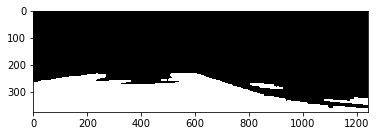

In [262]:
# find all of the connected components (white blobs in your image).
# im_with_separated_blobs is an image where each detected blob has a different pixel value ranging from 1 to nb_blobs - 1.
image1copy = np.uint8(er)
# th, im_th = cv2.threshold(image1copy, 100, 255, cv2.THRESH_BINARY)
image1copy = cv2.bitwise_not(image1copy)
nb_blobs, im_with_separated_blobs, stats, _ = cv2.connectedComponentsWithStats(image1copy)
# stats (and the silenced output centroids) gives some information about the blobs. See the docs for more information. 
# here, we're interested only in the size of the blobs, contained in the last column of stats.
sizes = stats[:, -1]
# the following lines result in taking out the background which is also considered a component, which I find for most applications to not be the expected output.
# you may also keep the results as they are by commenting out the following lines. You'll have to update the ranges in the for loop below. 
sizes = sizes[1:]
nb_blobs -= 1
# minimum size of particles we want to keep (number of pixels).
# here, it's a fixed value, but you can set it as you want, eg the mean of the sizes or whatever.
min_size = 5000

# output image with only the kept components
im_result = np.zeros((er.shape))
# for every component in the image, keep it only if it's above min_size
for blob in range(nb_blobs):
    if sizes[blob] >= min_size:
        # see description of im_with_separated_blobs above
        im_result[im_with_separated_blobs == blob + 1] = 255
im_result = cv2.bitwise_not(im_result)
plt.imshow(im_result,'gray')


In [263]:
def ADI_to_road(img_ADI):
    img_op = img_ADI_det(img_ADI)
    kernel = 1/13**2*np.ones((9,9))

    er = cv2.erode(img_op,kernel,iterations = 1)


    for i in range(er.shape[0]):
        for j in range(er.shape[1]):
            if i<=200:
                er[i,j] = 0
    # find all of the connected components (white blobs in your image).
    # im_with_separated_blobs is an image where each detected blob has a different pixel value ranging from 1 to nb_blobs - 1.
    image1copy = np.uint8(er)
    # th, im_th = cv2.threshold(image1copy, 100, 255, cv2.THRESH_BINARY)
    image1copy = cv2.bitwise_not(image1copy)
    nb_blobs, im_with_separated_blobs, stats, _ = cv2.connectedComponentsWithStats(image1copy)
    # stats (and the silenced output centroids) gives some information about the blobs. See the docs for more information. 
    # here, we're interested only in the size of the blobs, contained in the last column of stats.
    sizes = stats[:, -1]
    # the following lines result in taking out the background which is also considered a component, which I find for most applications to not be the expected output.
    # you may also keep the results as they are by commenting out the following lines. You'll have to update the ranges in the for loop below. 
    sizes = sizes[1:]
    nb_blobs -= 1
    # minimum size of particles we want to keep (number of pixels).
    # here, it's a fixed value, but you can set it as you want, eg the mean of the sizes or whatever.
    min_size = 5000

    # output image with only the kept components
    im_result = np.zeros((er.shape))
    # for every component in the image, keep it only if it's above min_size
    for blob in range(nb_blobs):
        if sizes[blob] >= min_size:
            # see description of im_with_separated_blobs above
            im_result[im_with_separated_blobs == blob + 1] = 255
    im_result = cv2.bitwise_not(im_result)
    fin_image = im_result
    return fin_image

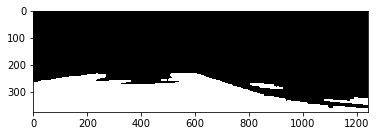

In [246]:
op = ADI_to_road(img_ADI)
plt.imshow(op,'gray')

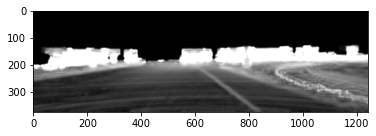

In [257]:
img_ADI2 = plt.imread('/home/sourish-wicon-lab/Documents/WSN/ADI-testing/ADI/umm_000002.png')
plt.imshow(img_ADI2,'gray')


In [272]:
import timeit

Start time : 46790.253642996
Time difference : 0.02289398299762979


True

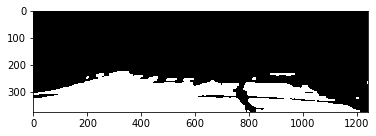

In [273]:
starting_time = timeit.default_timer()

print("Start time :",starting_time)
op2 = ADI_to_road(img_ADI2)
print("Time difference :", timeit.default_timer() - starting_time)
plt.imshow(op2,'gray')
cv2.imwrite('./outputs/results/' + 'output' + '_road_' + '1' + '.png', op2)

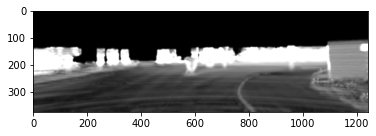

In [260]:
img_ADI2 = plt.imread('/home/sourish-wicon-lab/Documents/WSN/ADI-testing/ADI/umm_000003.png')
plt.imshow(img_ADI2,'gray')


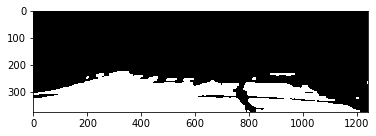

In [264]:
op3 = ADI_to_road(img_ADI2)
plt.imshow(op3,'gray')


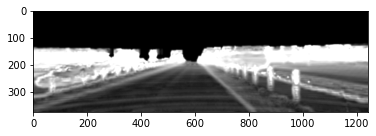

In [267]:
img_ADI4 = plt.imread('/home/sourish-wicon-lab/Documents/WSN/ADI-testing/ADI/umm_000004.png')
plt.imshow(img_ADI4,'gray')

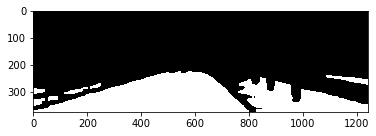

In [268]:
op4 = ADI_to_road(img_ADI4)
plt.imshow(op4,'gray')

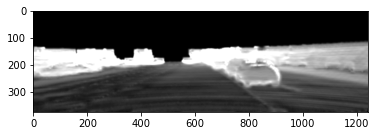

In [269]:
img_ADI5= plt.imread('/home/sourish-wicon-lab/Documents/WSN/ADI-testing/ADI/umm_000005.png')
plt.imshow(img_ADI5,'gray')

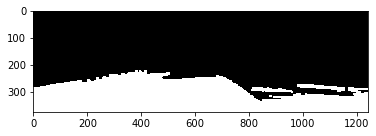

In [270]:
op5 = ADI_to_road(img_ADI5)
plt.imshow(op5,'gray')